
## Main Objective of the Analysis

The main objective of this analysis is to create a model focused on prediction. The goal is to predict customer retention or churn using various customer attributes. This model will not only provide accurate predictions but also offer actionable insights for the business to improve customer retention strategies. By identifying patterns in customer behavior, the business can tailor its loyalty programs and marketing efforts, leading to improved customer retention rates and increased revenue.
    


## Dataset Description

The dataset used for this analysis consists of customer demographic information, purchase history, and engagement metrics. Key attributes include:

- **Customer Demographics**: Age, Gender, Location
- **Purchase Behavior**: Item Purchased, Category, Purchase Amount (USD), Previous Purchases
- **Customer Engagement**: Review Rating, Subscription Status, Discount Applied, Promo Code Used
- **Shipping & Payment Information**: Shipping Type, Payment Method

The objective of this analysis is to predict whether a customer is likely to make a repeat purchase or churn, thus aiding the company in retaining more customers and improving overall business performance.
    


## Data Exploration and Feature Engineering

Data exploration involved analyzing the distribution of key features like purchase frequency, customer age, and product categories. Several steps were taken to clean and preprocess the data:

- Encoding categorical variables (e.g., Gender, Item Purchased, Shipping Type) using one-hot encoding and ordinal encoding.
- Scaling numerical variables such as purchase amount and previous purchases to ensure that all features are on a similar scale.

Additionally, feature engineering involved creating new variables like customer recency (time since last purchase) and total lifetime spending, which are important predictors of retention.
    


## Classifier Model Training

We trained and evaluated at least three different classifier models to predict customer retention. The models chosen are diverse in their approach to predictability and explainability:

1. **Dummy Classifier (Stratified)**: A baseline model that predicts based on the class distribution of the target variable. This provides a benchmark for other models and helps evaluate their improvement over random                                            predictions.
2. **Logistic Regression**: A linear model that provides insights into the relationships between customer attributes and retention. It is simple and interpretable, making it ideal for business use.
3. **RBF SVM**: A support vector machine model with a radial basis function (RBF) kernel that captures non-linear relationships in the data, improving predictive accuracy for complex patterns.
4. **Random Forest Classifier**: An ensemble model that aggregates multiple decision trees to enhance predictive performance and feature importance analysis.
5. **K-Nearest Neighbors (KNN)**: A non-parametric model that classifies customers based on their similarity (proximity) to known classes.
6. **Decision Tree**: A simple tree-based model that is easy to interpret and visualize, though it tends to overfit without regularization.

All models used the same training and test splits to ensure consistency in evaluation metrics, and cross-validation was performed to avoid overfitting.
    


## Recommended Model

Based on the performance metrics, **Logistic Regression** stands out as a balanced and interpretable model for customer retention prediction. With a high test accuracy of 83.43% and a perfect recall score, Logistic Regression ensures that nearly all potential returning customers are correctly identified. This model also offers the advantage of simplicity and transparency, making it easier for business stakeholders to understand how various features influence the likelihood of customer retention.
    


## Key Findings and Insights

The most important drivers of customer retention, as identified by the model, include:

- **Customer Recency**: Customers who made recent purchases are more likely to return.
- **Total Lifetime Spending**: High-value customers who spend more tend to have higher retention rates.
- **Subscription Status**: Customers with active subscriptions are more likely to make repeat purchases.

These insights will enable the business to prioritize its marketing and loyalty program efforts towards high-value, active customers and tailor retention strategies accordingly.
    


## Next Steps

Future analysis could involve:

- Adding more features such as customer interaction with marketing emails, customer service interactions, or website activity, which may improve the model's accuracy and explainability.
- Refining the model by incorporating time-series data to capture temporal trends in customer behavior.
- Conducting a deeper analysis on specific customer segments (e.g., high spenders vs. low spenders) to tailor more personalized retention strategies.
    

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import scipy.stats

In [27]:
import sklearn
print(sklearn.__version__)


1.5.2


In [28]:
pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.12.3
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: c:\users\ehsan\anaconda3\lib\site-packages
Requires: scikit-learn, numpy, scipy, joblib, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.model_selection import train_test_split, learning_curve,StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [31]:
import sqlite3

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
customer_df = pd.read_csv("customer_details.csv")
customer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [34]:
customer_df['Customer ID'].duplicated().sum()

0

In [35]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [36]:
customer_df.shape

(3900, 18)

In [37]:
# Dictionary for renaming columns
rename_dict = {
    'Gender': 'gender',
    'Item Purchased': 'item_purchased',
    'Category': 'category',
    'Location': 'location',
    'Size': 'size',
    'Age' : 'age',
    'Color': 'color',
    'Season': 'season',
    'Subscription Status': 'subscription_status',
    'Shipping Type': 'shipping_type',
    'Discount Applied': 'discount_applied',
    'Promo Code Used': 'promo_code',
    'Payment Method': 'payment_method',
    'Frequency of Purchases': 'purchase_frequency',
    'customer_id': 'customer_id',
    'customer_age': 'customer_age',
    'Purchase Amount (USD)': 'purchase_amount_usd',
    'Review Rating': 'review_rating',
    'Previous Purchases': 'previous_purchases'
}

# Applying renaming
customer_df.rename(columns=rename_dict, inplace=True)

# Verifying the column renaming
customer_df.head()


,Customer ID,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code,previous_purchases,payment_method,purchase_frequency
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Data Preprocessing and Feature Engineering

In [38]:
#Missing Data
customer_df.isnull().sum()

#There is no missing Data

Customer ID            0
age                    0
gender                 0
item_purchased         0
category               0
purchase_amount_usd    0
location               0
size                   0
color                  0
season                 0
review_rating          0
subscription_status    0
shipping_type          0
discount_applied       0
promo_code             0
previous_purchases     0
payment_method         0
purchase_frequency     0
dtype: int64

In [39]:
customer_df.duplicated().any().sum()


0

In [40]:
Categorical_Cols = customer_df.select_dtypes('object').columns
Categorical_Cols

Index(['gender', 'item_purchased', 'category', 'location', 'size', 'color',
       'season', 'subscription_status', 'shipping_type', 'discount_applied',
       'promo_code', 'payment_method', 'purchase_frequency'],
      dtype='object')

In [41]:
numerical_Cols = customer_df.select_dtypes(exclude='object').columns.drop('Customer ID')
numerical_Cols

Index(['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases'], dtype='object')

In [42]:
# Descreptive Statistics
stats_df = customer_df.describe().T

stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df

,count,mean,std,min,25%,50%,75%,max,range
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0,3899.0
age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0,52.0
purchase_amount_usd,3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0,80.0
review_rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0,2.5
previous_purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0,49.0


In [43]:
num_df = customer_df.select_dtypes(exclude ='object').drop(columns = ['Customer ID'])
corr_df = num_df.corr()#['purchase_amount_usd'].sort_values(ascending = False)
corr_df

,age,purchase_amount_usd,review_rating,previous_purchases
age,1.000000,-0.010424,-0.021949,0.040445
purchase_amount_usd,-0.010424,1.000000,0.030776,0.008063
review_rating,-0.021949,0.030776,1.000000,0.004229
previous_purchases,0.040445,0.008063,0.004229,1.000000


In [44]:
spearman_corr = num_df.corr(method='spearman')#['purchase_amount_usd'].sort_values(ascending = False)
spearman_corr

,age,purchase_amount_usd,review_rating,previous_purchases
age,1.000000,-0.010445,-0.021969,0.040513
purchase_amount_usd,-0.010445,1.000000,0.030380,0.008315
review_rating,-0.021969,0.030380,1.000000,0.004438
previous_purchases,0.040513,0.008315,0.004438,1.000000


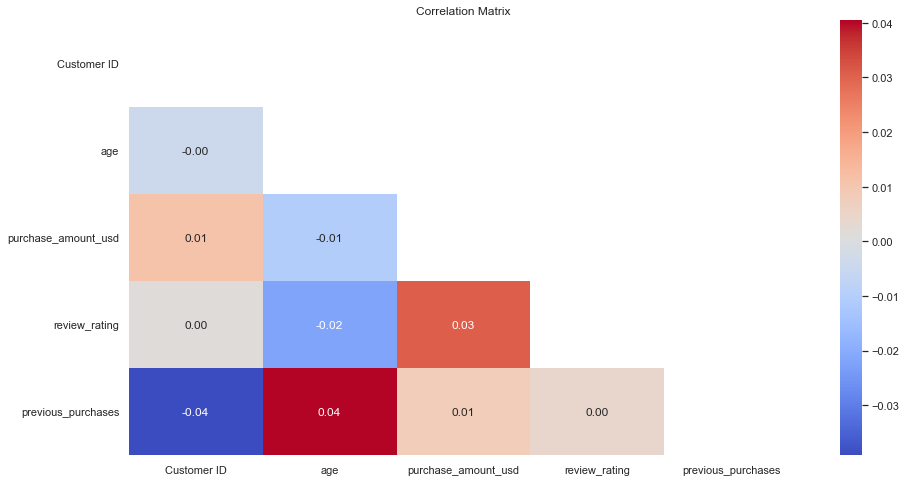

In [45]:
corr_matrix = customer_df.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot = True, mask = mask, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation Analysis Summary

In this analysis, we compared the **Pearson** and **Spearman** correlations between several numerical features in the dataset, including `age`, `purchase_amount_usd`, `review_rating`, and `previous_purchases`. Both Pearson and Spearman correlations were computed to understand both linear and non-linear monotonic relationships between these variables.

### Pearson Correlation
The Pearson correlation measures the strength of **linear relationships** between variables. The results are as follows:

- **Age vs. Purchase Amount**: The Pearson correlation is -0.0104, indicating no significant linear relationship between a customer's age and their purchase amount.
- **Age vs. Review Rating**: The correlation is -0.0219, suggesting no strong linear relationship between age and the rating given by customers.
- **Purchase Amount vs. Review Rating**: The correlation is 0.0308, which is very close to zero, indicating no linear relationship between how much a customer spends and the review rating they provide.
- **Previous Purchases**: The correlations between `previous_purchases` and other features (age, purchase amount, review rating) are all close to zero, suggesting no significant linear relationships.

### Spearman Correlation
The Spearman correlation captures **monotonic relationships** (which may be non-linear). The results are almost identical to those from the Pearson correlation:

- **Age vs. Purchase Amount**: The Spearman correlation is -0.0104, showing no meaningful monotonic relationship between age and purchase amount.
- **Age vs. Review Rating**: The correlation is -0.0219, indicating no significant monotonic relationship between age and review rating.
- **Purchase Amount vs. Review Rating**: The correlation is 0.0304, indicating no monotonic relationship between spending and review rating.
- **Previous Purchases**: The correlations with `previous_purchases` remain close to zero, consistent with the Pearson results.

### Conclusion
Both **Pearson** and **Spearman** correlation values are very close to zero for all feature pairs, indicating that there are no strong linear or monotonic relationships between these variables. Specifically:
- There is no significant relationship between a customer's **age**, **purchase amount**, **review rating**, or **previous purchases**.
- The consistency between Pearson and Spearman results further confirms that the relationships between these variables are weak, both in terms of linearity and monotonicity.

These findings suggest that these features may not be strong predictors of each other, and additional analysis or feature engineering may be needed to identify more meaningful relationships.



## What you can do next:
- **Explore Other Features**: Consider looking at categorical columns. Sometimes numerical features alone might not provide a good predictive signal, and combining numerical and categorical features could give better insights.

- **Transform Variables**: We could try transforming variables, such as applying logarithms or creating polynomial features to see if that improves the correlation.

- **Feature Engineering**: Consider creating new features from existing ones, like interaction terms (e.g., multiplying features together) or aggregating features based on time periods (if applicable).

- **Non-Linear Relationships**: Correlation only measures linear relationships. Consider using models that capture non-linear relationships like decision trees or ensemble methods such as Random Forest or Gradient Boosting.

In [46]:
#Target : subscription_status. Since it is a categorical target , we will use value_caount for data descreptive
# conclusion: imbalance data
customer_df.subscription_status.value_counts(normalize = True)


No     0.73
Yes    0.27
Name: subscription_status, dtype: float64

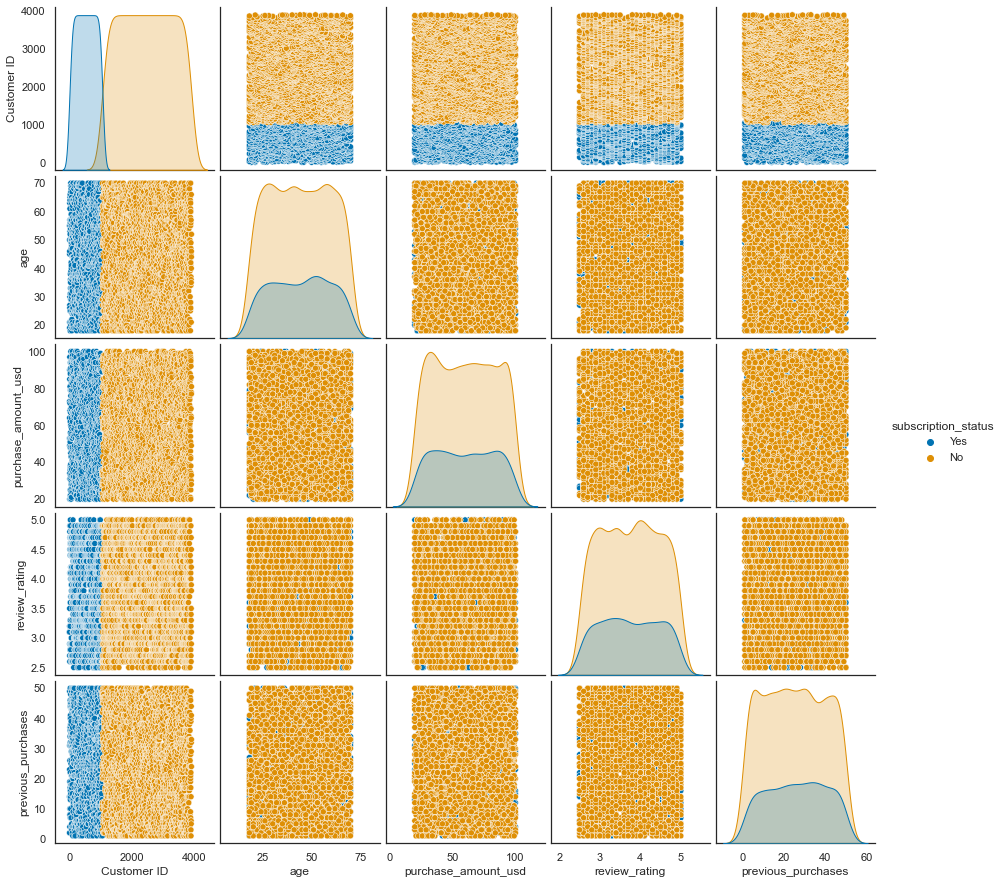

In [47]:
sns.set(context='notebook', style= 'white' , palette='colorblind')
sns.pairplot(customer_df, hue='subscription_status')

## Pairplot Analysis of Customer Features

A pairplot was generated to visualize the relationships between various customer features (`age`, `purchase_amount_usd`, `review_rating`, `previous_purchases`) and their `subscription_status` (Yes/No).

### Key Observations:
- **Age Distribution**: The distribution of age is similar for both subscribers and non-subscribers, with no clear visible separation between the two groups. This suggests that **age is not a strong predictor** of subscription status.
  
- **Purchase Amount Distribution**: Both subscribers and non-subscribers show a wide range of purchase amounts, and the overlap between the two groups is significant. This indicates that **purchase amount may not play a decisive role** in determining subscription status, as customers across the purchase spectrum are both subscribing and not subscribing.

- **Review Rating Distribution**: There is a visible overlap in the distribution of review ratings for both groups. No clear pattern emerges to indicate that customers with higher or lower review ratings are more likely to subscribe. Thus, **review rating does not seem to be a strong differentiating factor** between subscribers and non-subscribers.

- **Previous Purchases**: Similar to the other variables, the number of previous purchases shows substantial overlap between the two groups. This suggests that **the number of previous purchases may not be a significant factor** in predicting whether a customer will subscribe or not.

### Conclusion:
From the pairplot analysis, it appears that none of the individual features (`age`, `purchase_amount_usd`, `review_rating`, `previous_purchases`) provide a clear distinction between customers who subscribe and those who do not. This suggests that more complex relationships (perhaps involving feature interactions) or other features not included in this plot may need to be explored to improve predictive power for `subscription_status`.

### Next Steps:
- **Explore Feature Interactions**: It may be useful to explore interactions between features (e.g., age and purchase amount) to see if combined effects provide better predictive power.
- **Examine Other Features**: Investigate other features in the dataset that may have a stronger relationship with subscription status.
- **Consider Advanced Models**: Given the lack of clear linear relationships, it might be helpful to apply non-linear models such as decision trees, Random Forests, or Gradient Boosting to better capture complex patterns in the data.


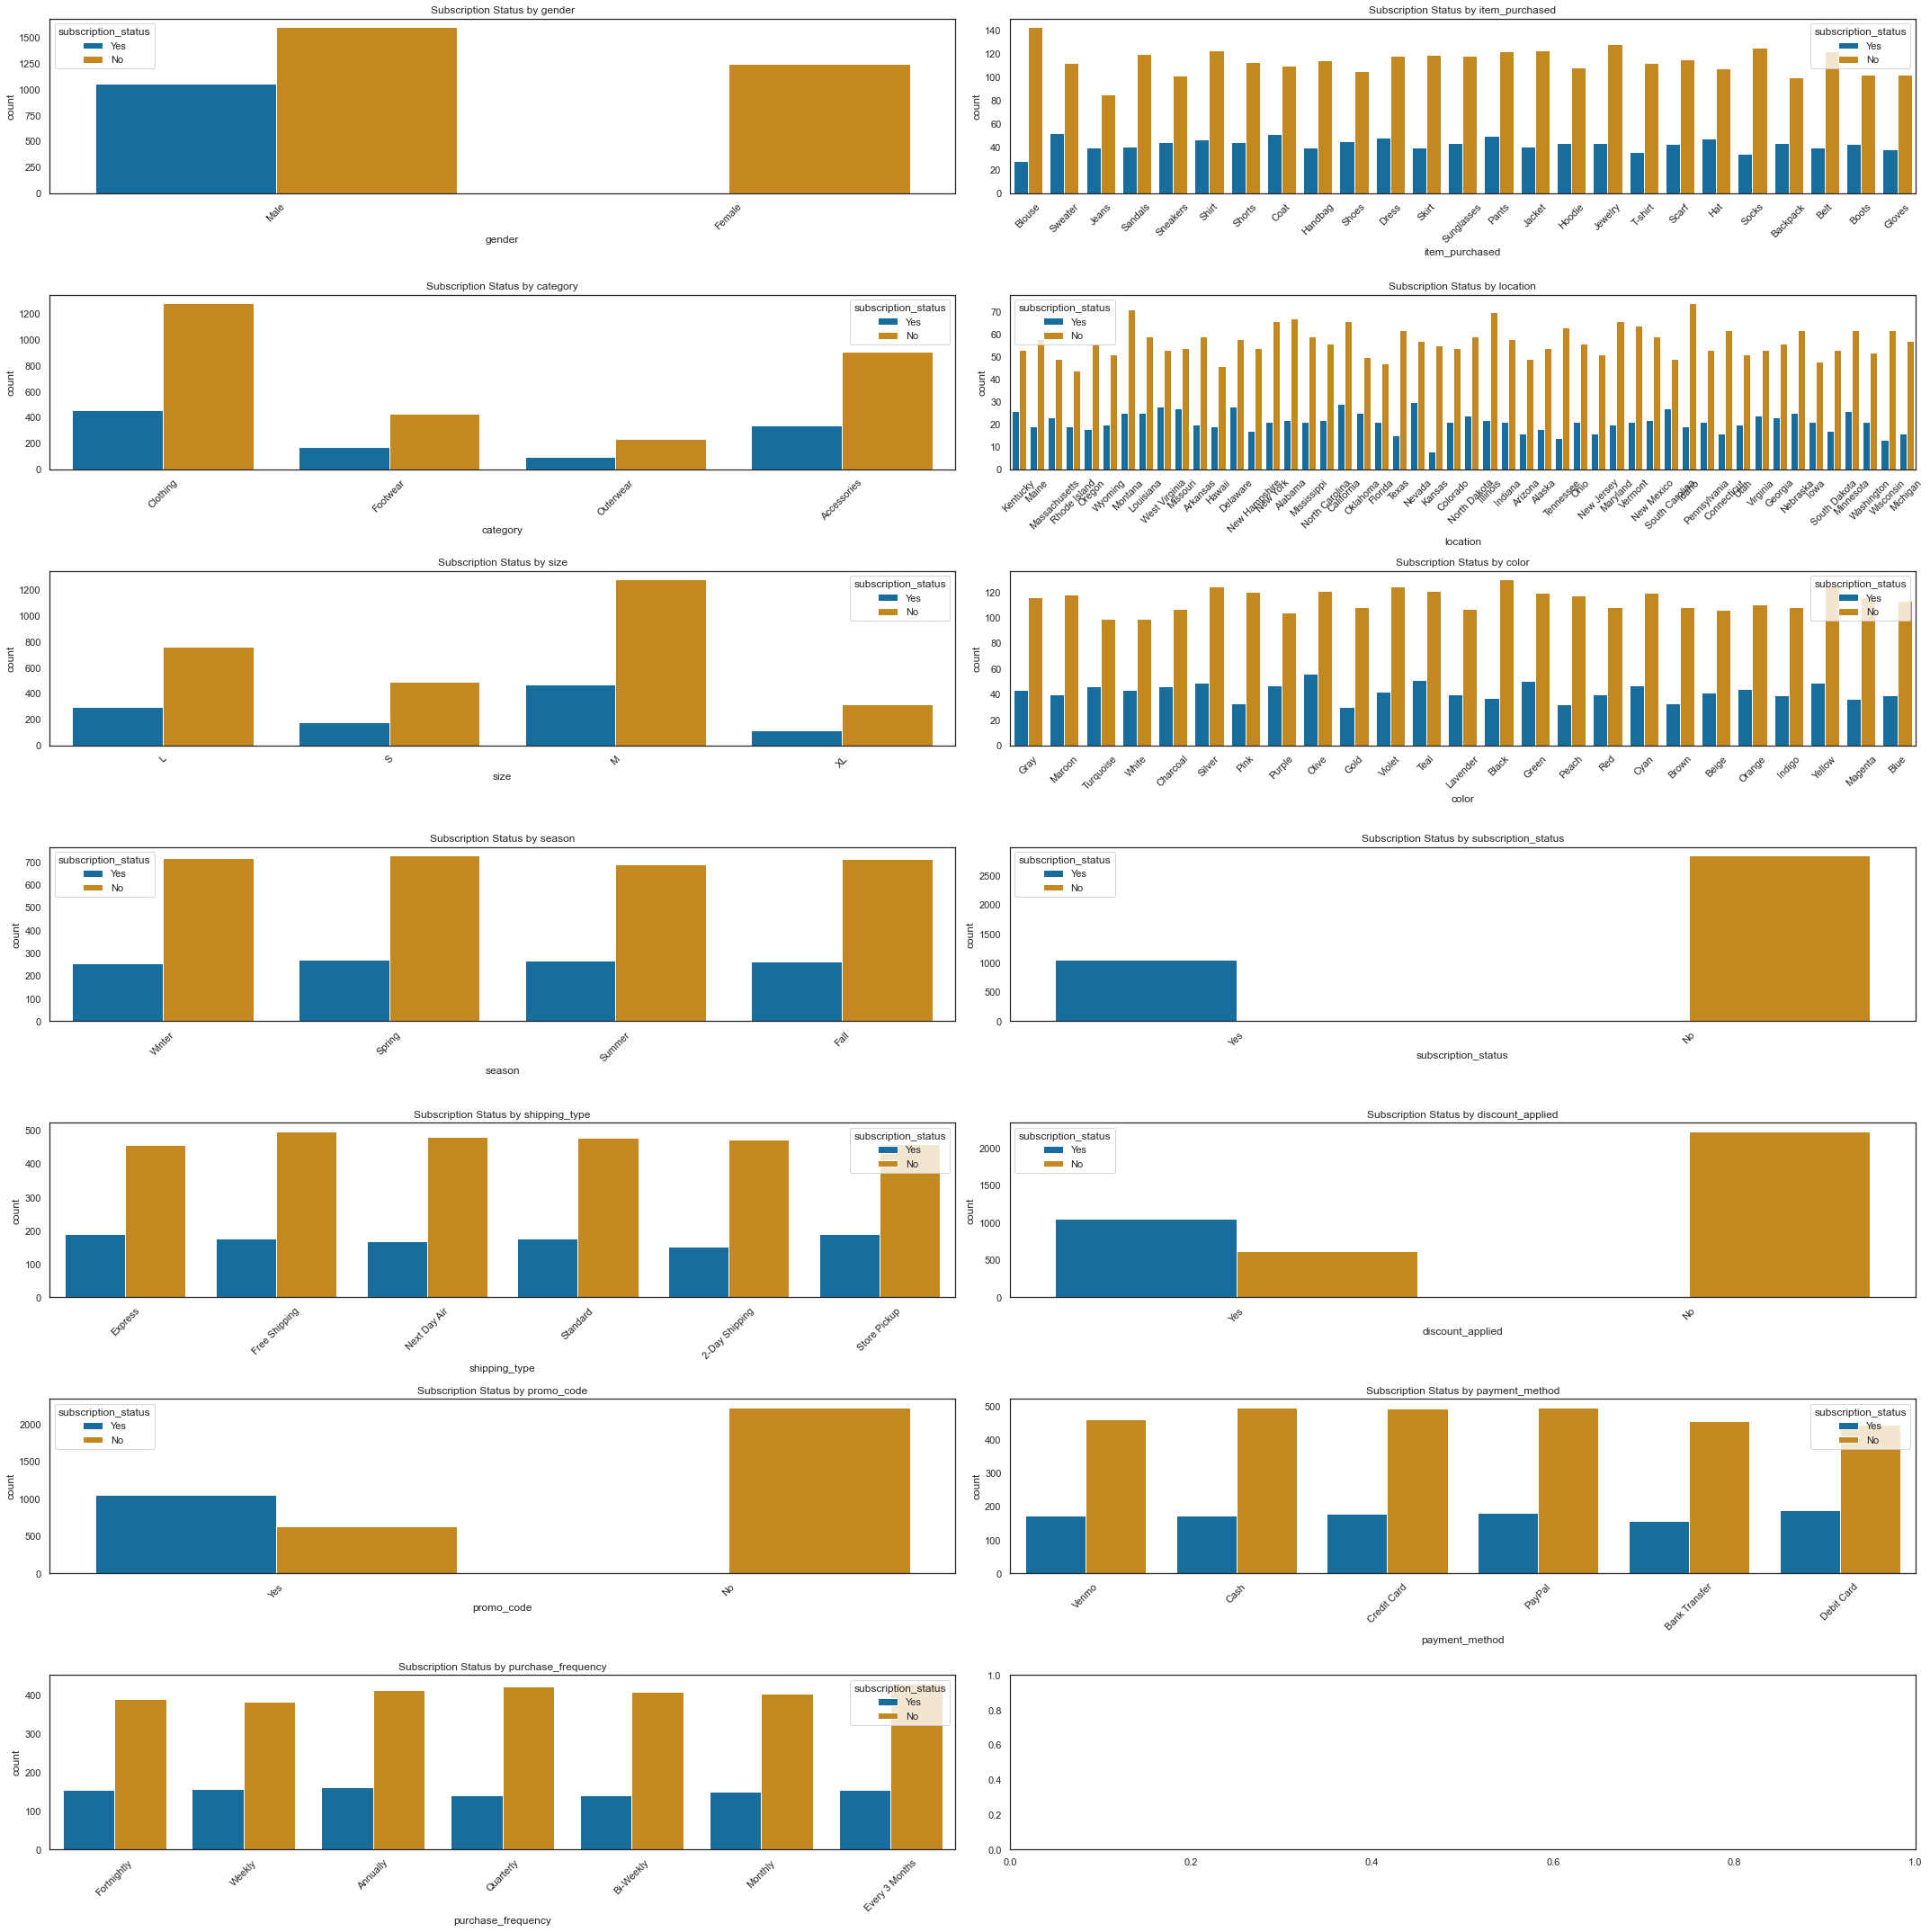

In [48]:
sns.set(context='notebook', style= 'white' , palette='colorblind')
rows, cols = 7,2
total_plots = len(Categorical_Cols)
fig, axes = plt.subplots(rows,cols, figsize=(30,30))
axes = axes.flatten()
                         
for idx,i in enumerate(Categorical_Cols):
    #if i != 'subscription_status':
        sns.countplot(x=i, hue='subscription_status', data=customer_df, ax=axes[idx])
        axes[idx].set_title(f'Subscription Status by {i}')
        axes[idx].tick_params(axis = 'x', rotation=45)

plt.tight_layout()
plt.show()


## Categorical Analysis of Subscription Status

The following count plots illustrate the distribution of the `subscription_status` (Yes/No) across several categorical features such as gender, category, location, item purchased, and others. These visualizations help us understand how different groups of customers relate to the likelihood of subscribing or not.

### Key Observations:

1. **Subscription Status by Gender**:
   - Males tend to subscribe more frequently than females, but both genders have a significant number of non-subscribers. This suggests a possible gender bias in subscription behavior.

2. **Subscription Status by Category**:
   - Customers purchasing **Clothing** and **Accessories** have a higher chance of not subscribing, whereas categories like **Footwear** and **Outerwear** have a more balanced distribution between subscribers and non-subscribers.
   
3. **Subscription Status by Item Purchased**:
   - There is a significant variance in subscription rates based on the type of item purchased. Some items like **Shirts** and **Shoes** show higher non-subscription counts, while other items like **Suits** have more balanced subscription distributions.
   
4. **Subscription Status by Location**:
   - Location-based analysis shows that some locations have a higher count of non-subscribers, though the subscription status is somewhat evenly distributed across various locations.

5. **Subscription Status by Size**:
   - Customers purchasing items of size **M** are less likely to subscribe, with a higher count of non-subscribers in this group. Other sizes show similar patterns but with fewer customers overall.

6. **Subscription Status by Color**:
   - Across different colors, non-subscribers dominate in nearly all cases. There doesn't appear to be any particular color preference that significantly influences subscription status.

7. **Subscription Status by Season**:
   - Across the different seasons, the distribution of non-subscribers is consistently higher than subscribers. Interestingly, **Fall** sees a slightly higher count of subscribers compared to other seasons.

8. **Subscription Status by Shipping Type**:
   - Shipping options like **Free Shipping** and **Standard** have higher non-subscription rates, whereas **2-Day Shipping** shows a slightly more balanced distribution of subscribers and non-subscribers.

9. **Subscription Status by Discount Applied**:
   - A noticeable pattern emerges here: customers who had discounts applied are significantly more likely to **not** subscribe, indicating that discounts alone may not be a strong incentive for subscribing.

10. **Subscription Status by Promo Code Used**:
    - Customers who used a promo code show a higher count of subscriptions compared to those who didn't. Promo codes appear to have a positive impact on subscription rates.

11. **Subscription Status by Payment Method**:
    - The **Cash** and **Debit Card** payment methods show a higher count of non-subscribers, while **Credit Card** and **Bank Transfer** methods have a more balanced subscription distribution.

12. **Subscription Status by Purchase Frequency**:
    - Customers with **Frequent** and **Weekly** purchase patterns are more likely to subscribe, while those who purchase **Annually** or **Occasionally** show a higher rate of non-subscription.

### Conclusion:
These visualizations reveal key differences in subscription behavior across various categorical features. While many categories show a higher count of non-subscribers, certain features like **promo codes**, **frequent purchase behavior**, and **specific items or categories** seem to be more associated with a higher likelihood of subscription. These insights can guide targeted marketing strategies to improve subscription rates.

### Next Steps:
- Further analysis could include combining categorical features with numerical ones to explore interaction effects.
- Consider applying machine learning models like **decision trees** or **random forests** to capture complex interactions between categorical features and subscription status.


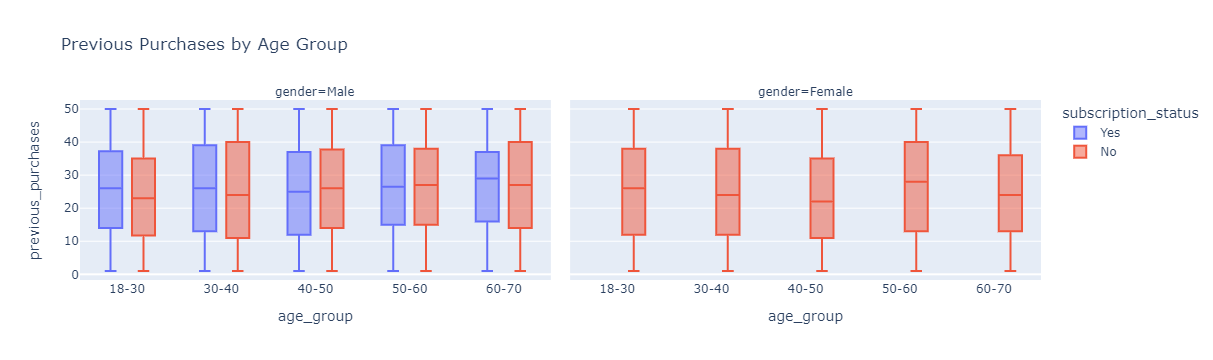

In [49]:
# Creating age groups
customer_df['age_group'] = pd.cut(customer_df['age'], 
                                  bins=[18, 30, 40, 50, 60, 70], 
                                  labels=['18-30', '30-40', '40-50', '50-60', '60-70'],
                                  right=True, include_lowest=True) 

# Check the head of the dataframe to ensure the new column is created
#customer_df.head()

# Define the correct order for the age groups
age_group_order = ['18-30', '30-40', '40-50', '50-60', '60-70']

# Box plot of previous purchases by category, colored by subscription status, faceted by age group
fig = px.box(customer_df, 
             x='age_group', 
             y='previous_purchases', 
             color='subscription_status',
             facet_col='gender',
             #facet_row='promo_code',
             category_orders={'age_group': age_group_order},  
             title='Previous Purchases by Age Group')

#fig.update_layout(
   #width=8000,  # Set custom width
    #height=500   # Set custom height
#)
# Show the plot
fig.show()

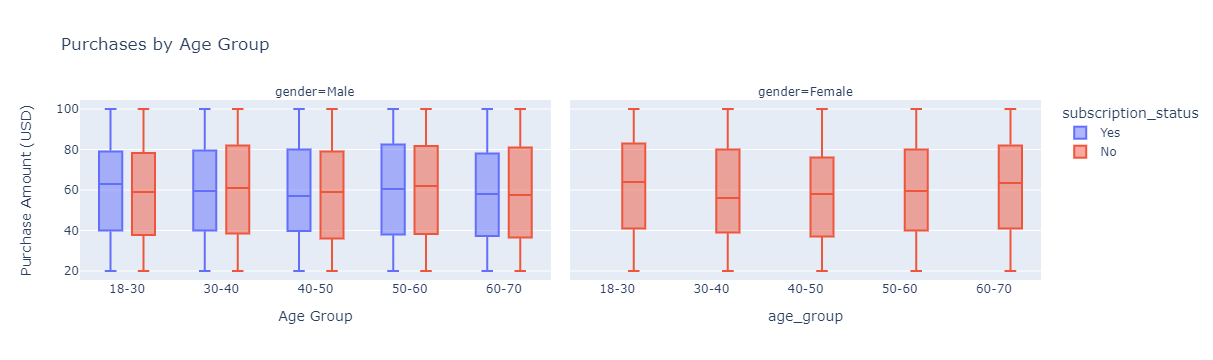

In [50]:


# Box plot of previous purchases by category, colored by subscription status, faceted by age group
fig = px.box(customer_df, 
             x='age_group', 
             y='purchase_amount_usd', 
             color='subscription_status',
             facet_col='gender',
             #facet_row='promo_code',
             category_orders={'age_group': age_group_order},  
             title='Purchases by Age Group')

fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Purchase Amount (USD)',
) 
fig.show()

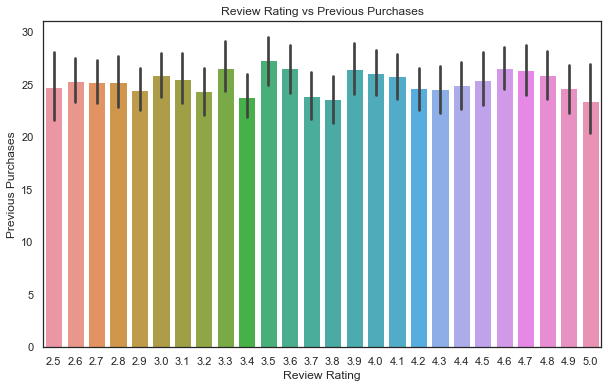

In [51]:
sns.set(context='notebook', style='white', palette='colorblind')
plt.figure(figsize=(10,6))
sns.barplot(x='review_rating', y='previous_purchases', data=customer_df)


plt.title('Review Rating vs Previous Purchases')
plt.xlabel('Review Rating')
plt.ylabel('Previous Purchases')

# Show the plot
plt.show()

In [52]:
# Define regions with their corresponding states
region_mapping = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
                  'New York', 'New Jersey', 'Pennsylvania'],
    
    'Midwest': ['Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 
                'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    
    'South': ['Delaware', 'Maryland', 'West Virginia', 'Virginia', 'Kentucky', 'North Carolina', 
              'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee', 'Mississippi', 
              'Arkansas', 'Louisiana', 'Texas', 'Oklahoma'],
    
    'West': ['Montana', 'Wyoming', 'Colorado', 'New Mexico', 'Idaho', 'Utah', 'Arizona', 
             'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']
}

# Initialize the 'Region' column
customer_df['region'] = np.nan

# Use np.where() to assign regions based on 'Location'
for region, states in region_mapping.items():
    customer_df['region'] = np.where(customer_df['location'].isin(states), region, customer_df['region'])

In [53]:
customer_df.region.value_counts()

South        1271
West         1018
Midwest       937
Northeast     674
Name: region, dtype: int64

In [54]:
customer_df.drop(columns=['Customer ID', 'location', 'age_group'],axis = 1, inplace = True)

In [55]:
#customer_df['subscription_status'].replace(['No','Yes'],[0,1], inplace = True)

customer_df['subscription_status'] = customer_df['subscription_status'].map({'No' : 0,'Yes' : 1})

In [56]:
feature_cols = [ col for col in customer_df.columns if col != 'subscription_status']

strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size = 0.2, random_state = 42)
train_idx, test_idx = next(strat_shuf_split.split(customer_df[feature_cols], customer_df.subscription_status))

In [57]:
X_train = customer_df.loc[train_idx, feature_cols]
y_train = customer_df.loc[train_idx, 'subscription_status']

X_test = customer_df.loc[test_idx, feature_cols]
y_test = customer_df.loc[test_idx, 'subscription_status']

## 1.3 2.Preprocessing and building pipelines

In [58]:

categorical_features = ['item_purchased', 'category','region','color','shipping_type','payment_method']
ordinal_features = ['size','season','purchase_frequency']
binary_features = ['gender', 'discount_applied','promo_code']
drop = ['age_group']

In [59]:
# the order for ordinal features
size_order = ['S', 'M','L','XL']
season_order = ['Spring', 'Summer', 'Fall','Winter']
purchase_frequency_order = [ 'Weekly', 'Bi-Weekly', 'Fortnightly', 'Monthly','Every 3 Months','Quarterly','Annually']

# binary features
gender = ['Male', 'Female']
discount_applied = ['Yes', 'No']
promo_code = ['Yes', 'No']

In [60]:
customer_df.purchase_frequency.unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [61]:
# Define column transformers
categorical_transformer = OneHotEncoder(drop = 'first')
ordinal_transformer = OrdinalEncoder(categories = [size_order, season_order, purchase_frequency_order])
binary_transformer = OrdinalEncoder(categories = [gender,discount_applied,promo_code])

numeric_transformer = StandardScaler()

In [62]:
# ColumnTransformer for all feature types with explicit names
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('num', numeric_transformer, numerical_Cols)
    ],
    remainder='passthrough'
)

In [63]:
# Fit the preprocessor to your training data
preprocessor.fit(X_train)

# Apply the transformation to the training data
X_train_transformed = preprocessor.transform(X_train)

# Check the shape of the transformed data
print("Transformed shape:", X_train_transformed.shape)

# Optionally convert the transformed data to a pandas DataFrame for easier inspection
import pandas as pd

# If you don't know the transformed column names directly, just inspect the transformed data first
X_train_transformed_df = pd.DataFrame(X_train_transformed)

# Display the first few rows of the transformed data
print(X_train_transformed_df.head())


Transformed shape: (3120, 74)
                                                   0
0    (0, 15)\t1.0\n  (0, 24)\t1.0\n  (0, 29)\t1.0...
1    (0, 13)\t1.0\n  (0, 25)\t1.0\n  (0, 48)\t1.0...
2    (0, 14)\t1.0\n  (0, 28)\t1.0\n  (0, 41)\t1.0...
3    (0, 11)\t1.0\n  (0, 28)\t1.0\n  (0, 36)\t1.0...
4    (0, 0)\t1.0\n  (0, 28)\t1.0\n  (0, 41)\t1.0\...


In [64]:
#pipe = make_pipeline(preprocessor, RandomForestClassifier())

#scores = cross_validate(pipe, X_train, y_train, cv = 5, return_train_score =True)

In [65]:
# Assuming X_train and y_train are preprocessed and ready for modeling
models = {
    "Dummy": DummyClassifier(strategy='stratified'),
    "Logistic Regression": LogisticRegression(class_weight ='balanced'),
    "RBF SVM": SVC(class_weight='balanced'),
    "Random Forest Classifier": RandomForestClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),  # No class_weight
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}

results_dict = {}

for model_name, model in models.items():
    print(f"Processing {model_name}:")
    pipe = make_pipeline(preprocessor,model)
    
    try:
        
        # Directly applying the model (without preprocessing in the pipeline)
        scores = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True, scoring=['accuracy', 'f1', 'recall', 'precision'])
        
        # Store the results
        results_dict[model_name] = {
            'mean_train_accuracy': scores["train_accuracy"].mean().round(4),
            'mean_test_accuracy': scores["test_accuracy"].mean().round(4),
            'mean_train_f1': scores["train_f1"].mean().round(4),
            'mean_test_f1': scores["test_f1"].mean().round(4),
            'mean_train_recall': scores["train_recall"].mean().round(4),
            'mean_test_recall': scores["test_recall"].mean().round(4),
            'mean_train_precision': scores["train_precision"].mean().round(4),
            'mean_test_precision': scores["test_precision"].mean().round(4),
            'mean_fit_time (s)': scores["fit_time"].mean().round(4),
            'mean_score_time (s)': scores["score_time"].mean().round(4)
        }
    except Exception as e:
        print(f"Error processing {model_name}: {e}")

# Convert results dictionary to DataFrame for better visualization
results_df = pd.DataFrame(results_dict).T
results_df.sort_values(by='mean_test_accuracy', ascending = False)


Processing Dummy:
Processing Logistic Regression:
Processing RBF SVM:
Processing Random Forest Classifier:
Processing KNN:
Processing Decision Tree:


,mean_train_accuracy,mean_test_accuracy,mean_train_f1,mean_test_f1,mean_train_recall,mean_test_recall,mean_train_precision,mean_test_precision,mean_fit_time (s),mean_score_time (s)
Logistic Regression,0.8341,0.8343,0.7648,0.7652,0.9997,1.0000,0.6193,0.6197,0.0554,0.0219
RBF SVM,0.8340,0.8340,0.7648,0.7648,1.0000,1.0000,0.6191,0.6192,0.3992,0.0845
Random Forest Classifier,1.0000,0.8208,1.0000,0.7092,1.0000,0.8100,1.0000,0.6310,0.8203,0.0274
Decision Tree,1.0000,0.8032,1.0000,0.6265,1.0000,0.6129,1.0000,0.6422,0.0552,0.0150
KNN,0.8714,0.7974,0.7640,0.6223,0.7714,0.6188,0.7568,0.6263,0.0233,0.1040
Dummy,0.6111,0.6115,0.2825,0.2989,0.2838,0.3064,0.2814,0.2923,0.0289,0.0254


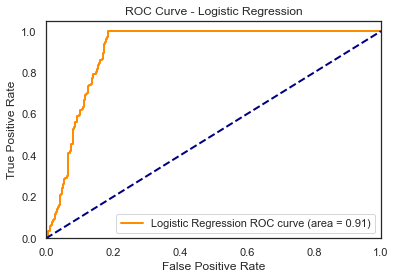

AUC for Logistic Regression: 0.9089


In [66]:
# Select the Logistic Regression model from your dictionary
logistic_regression = LogisticRegression()

# Create a pipeline with the preprocessor and Logistic Regression model
pipe_lr = make_pipeline(preprocessor, logistic_regression)

# Fit the pipeline on the training data
pipe_lr.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (class 1) on the test set
y_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f'AUC for Logistic Regression: {roc_auc_lr:.4f}')


### Interpretation of the ROC Curve and AUC for Logistic Regression

1. **ROC Curve**:
   - The **orange curve** represents the ROC curve for the **Logistic Regression model**.
   - The **x-axis** shows the **False Positive Rate (FPR)**, representing the proportion of non-subscription instances incorrectly classified as subscriptions.
   - The **y-axis** shows the **True Positive Rate (TPR)** (or **Recall**), which indicates the proportion of actual subscriptions correctly classified.

   The ideal ROC curve hugs the top-left corner, where the model performs best (high recall, low false positives).

2. **Diagonal Line (Baseline)**:
   - The **dotted line** represents a **random classifier** with no discriminatory power, where AUC = 0.5.
   - Since the orange curve is well above this baseline, the Logistic Regression model performs significantly better than random guessing.

3. **AUC (Area Under the Curve)**:
   - The **AUC score** of **0.9085** indicates **strong performance**. AUC values range from **0.5** (random guessing) to **1.0** (perfect classification).
   - An AUC of **0.91** means the model is very effective at distinguishing between subscription and non-subscription classes across various thresholds.

4. **Model Performance**:
   - The curve rises quickly, indicating a **high True Positive Rate (Recall)**, meaning the model successfully captures most of the true subscriptions.
   - However, there are some **False Positives**, where non-subscriptions are misclassified as subscriptions.

### Conclusion:
- The **AUC of 0.91** demonstrates that the Logistic Regression model performs **exceptionally well** in distinguishing between customers with and without subscriptions.
- Despite some **False Positives**, the model effectively balances **Recall** and **False Positive Rate**, making it highly reliable for this classification task.


In [67]:
# Parameter grid with correct naming for pipeline parameters
param_grid = {
    "logisticregression__C": scipy.stats.uniform(0, 100),  # Uniform distribution for C
    "logisticregression__penalty": ['l1', 'l2', 'elasticnet'],  # Regularization types
    "logisticregression__solver": ['liblinear', 'saga'],  # Solvers
    "logisticregression__max_iter": [100, 200, 300],  # Max iterations
    "logisticregression__l1_ratio": scipy.stats.uniform(0, 1) # Only relevant for elasticnet
}

# Create the pipeline
main_pipe = make_pipeline(preprocessor, LogisticRegression())

# Setup RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    main_pipe,
    param_distributions=param_grid,  # param_distributions is the correct name
    n_iter=10,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    random_state=123,
    n_jobs=-1,  # Use all available cores
    scoring="f1",  # Optimize for f1 score
    verbose=3,
    return_train_score=True
)

# Fit the RandomizedSearchCV
random_search_lr.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best Parameters: {random_search_lr.best_params_}")
print(f"Best Score: {random_search_lr.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'logisticregression__C': 71.23301813887625, 'logisticregression__l1_ratio': 0.4278634908378195, 'logisticregression__max_iter': 200, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Best Score: 0.7098502318937095


In [68]:
best_model_lr = random_search_lr.best_estimator_
best_model_lr.fit(X_train, y_train)
training_score_lr = random_search_lr.score(X_train, y_train)
testing_score_lr = random_search_lr.score(X_test, y_test)
print(training_score_lr)
print(testing_score_lr)

0.7606461086637298
0.7520325203252033


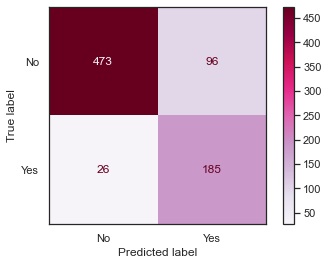

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Make predictions
y_pred = random_search_lr.predict(X_test)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix
cm_plot_lr = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cm_plot_lr.plot(cmap="PuRd")

# Show the plot
cm_plot_lr


In [70]:
predicted_y = random_search_lr.predict(X_test)
print(classification_report(y_test, predicted_y, digits=4,target_names=["Yes", "No"]))

              precision    recall  f1-score   support

         Yes     0.9479    0.8313    0.8858       569
          No     0.6584    0.8768    0.7520       211

    accuracy                         0.8436       780
   macro avg     0.8031    0.8540    0.8189       780
weighted avg     0.8696    0.8436    0.8496       780



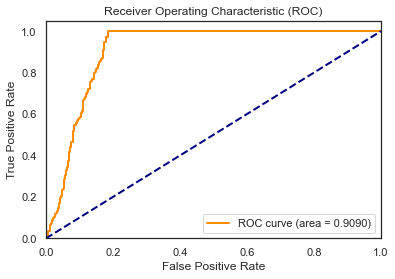

AUC: 0.9090


In [71]:
y_prob = best_model_lr.predict_proba(X_test)[:, 1]  # Probabilities for class "Yes" (positive class)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.4f}')


In [72]:
rs = 123

# Build a logistic regression model
def build_lr(X_train, y_train, X_test, threshold=0.5, best_params=None):
    # Set default model with baseline parameters
    model = LogisticRegression(random_state=rs)
    
    # If best parameters are provided, update the model with them
    if best_params:
        model = LogisticRegression(
            C=best_params['logisticregression__C'],  # Set C value
            penalty=best_params['logisticregression__penalty'],  # Set penalty ('l1', 'l2', etc.)
            solver=best_params['logisticregression__solver'],  # Set solver ('liblinear', 'saga', etc.)
            max_iter=best_params['logisticregression__max_iter'],  # Set max iterations
            random_state=rs
        )
        
        # If the penalty is 'elasticnet', include the l1_ratio parameter
        if best_params['logisticregression__penalty'] == 'elasticnet':
            model.l1_ratio = best_params['logisticregression__l1_ratio']
     
    # Train the model on the preprocessed, resampled data
    model.fit(X_train, y_train)

    # Get predicted probabilities for the test set
    X_test_preprocessed = preprocessor.transform(X_test)
    predicted_proba = model.predict_proba(X_test_preprocessed)
    
    # If predicted probability is larger than threshold, assign a positive label
    yp = (predicted_proba[:, 1] >= threshold).astype('int')
    
    # Return predictions and the trained model
    return yp, model



In [73]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

rs = 123

# Function to evaluate the model performance
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    
    # Precision, recall, F-beta score (using beta=5)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    
    # Add metrics to the results dictionary
    results_pos['recall'] = recall
    results_pos['auc'] = roc_auc_score(yt, yp)
    results_pos['precision'] = precision
    results_pos['fscore'] = f_beta
    
    return results_pos

# Example of using the evaluate function
# Assuming y_test and preds are defined (e.g., from the build_lr function)
# preds, model = build_lr(X_train, y_train, X_test)
#result = evaluate(y_test, preds)

#print(result)


In [74]:
def resample(X_train, y_train):
    # First, fit the preprocessor on the training data
    X_train_preprocessed = preprocessor.fit_transform(X_train)

    # SMOTE sampler (Oversampling)
    smote = SMOTE(random_state=123)
    X_smo, y_smo = smote.fit_resample(X_train_preprocessed, y_train)
    
    # Undersampling
    under = RandomUnderSampler(random_state=123)
    X_under, y_under = under.fit_resample(X_train_preprocessed, y_train)
    
    return X_smo, y_smo, X_under, y_under



In [75]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    print(df)
    
    # Set up the categories for the x-axis
    x = np.arange(5)  # Five metrics: Accuracy, Recall, AUC, Precision, Fscore
    
    # Get values for each type
    original = df.iloc[0, 1:].values
    balanced = df.iloc[1, 1:].values
    class_weight = df.iloc[2, 1:].values
    smote = df.iloc[3, 1:].values
    under = df.iloc[4, 1:].values
    
    width = 0.15  # Width of the bars (adjusted to fit all categories)
    
    # Plot the bar chart
    plt.figure(figsize=(12, 10), dpi=80)
    
    # Plot each category
    plt.bar(x - 0.3, original, width, color='#95a5a6', label="Original")
    plt.bar(x - 0.15, balanced, width, color='#f39c12', label="Balanced")
    plt.bar(x, class_weight, width, color='#d35400', label="Class Weight")
    plt.bar(x + 0.15, smote, width, color='#2980b9', label="SMOTE")
    plt.bar(x + 0.3, under, width, color='#3498db', label="Undersampling")
    
    # Set x-ticks and labels
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()


## Build a logistic regression model with the original dataset

In [76]:
best_params = {
   'logisticregression__C': 68.48297385848633,
   'logisticregression__l1_ratio': 0.48093190148436094,  # Only relevant for elasticnet
   'logisticregression__max_iter': 200,
   'logisticregression__penalty': 'l1',
   'logisticregression__solver': 'liblinear'
}

In [77]:
results = []


# Train the model
best_model_lr.fit(X_train, y_train)


# Get predicted probabilities
predicted_proba = best_model_lr.predict_proba(X_test)
    
# If predicted probability is larger than threshold (default value is 0.5), generate a positive label
threshold = 0.5
yp = (predicted_proba[:, 1] >= threshold).astype('int')
    
result = evaluate(y_test, yp)
results.append(result)

In [78]:
result

{'type': 'Original',
 'accuracy': 0.8435897435897436,
 'recall': 0.8767772511848341,
 'auc': 0.8540301018665821,
 'precision': 0.6583629893238434,
 'fscore': 0.8657307415406768}

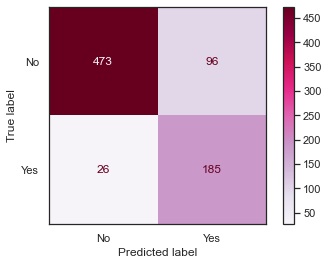

In [79]:
# Step 1: Make predictions
y_pred = best_model_lr.predict(X_test)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix
cm_plot_lr = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cm_plot_lr.plot(cmap="PuRd")

# Show the plot
cm_plot_lr

### Build a logistic regression model with class weights(Balanced)

In [80]:
best_params_balanced = {
   'logisticregression__C': 68.48297385848633,
   'logisticregression__l1_ratio': 0.48093190148436094,  # Only relevant for elasticnet
   'logisticregression__max_iter': 200,
   'logisticregression__penalty': 'l1',
   'logisticregression__solver': 'liblinear',
    'logisticregression__class_weight' :'balanced'
}

In [81]:
pipe = make_pipeline(preprocessor, LogisticRegression())

pipe.set_params(**best_params_balanced)
                     
pipe.fit(X_train, y_train)
predicted_proba = pipe.predict_proba(X_test)
                     
threshold = 0.5
yp = (predicted_proba[:, 1] >= threshold).astype('int')
    
result = evaluate(y_test, yp, 'Balanced')
results.append(result)               

In [82]:
results

[{'type': 'Original',
  'accuracy': 0.8435897435897436,
  'recall': 0.8767772511848341,
  'auc': 0.8540301018665821,
  'precision': 0.6583629893238434,
  'fscore': 0.8657307415406768},
 {'type': 'Balanced',
  'accuracy': 0.8641025641025641,
  'recall': 1.0,
  'auc': 0.9068541300527241,
  'precision': 0.6656151419558359,
  'fscore': 0.9810443490701002}]

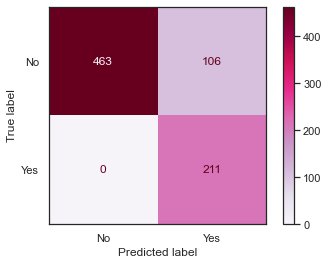

In [83]:
y_pred = pipe.predict(X_test)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix
cm_plot_lr = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cm_plot_lr.plot(cmap="PuRd")

# Show the plot
cm_plot_lr

### Build a logistic regression model with class weights

In [84]:
best_params_balanced = {
   'logisticregression__C': 68.48297385848633,
   'logisticregression__l1_ratio': 0.48093190148436094,  # Only relevant for elasticnet
   'logisticregression__max_iter': 200,
   'logisticregression__penalty': 'l1',
   'logisticregression__solver': 'liblinear',
    'logisticregression__class_weight' : {0: 0.7, 1: 0.3}
}



pipe = make_pipeline(preprocessor, LogisticRegression())

pipe.set_params(**best_params_balanced)
                     
pipe.fit(X_train, y_train)
predicted_proba = pipe.predict_proba(X_test)
                     
threshold = 0.5
yp = (predicted_proba[:, 1] >= threshold).astype('int')
    
result = evaluate(y_test, yp, 'Class_weight')
results.append(result) 

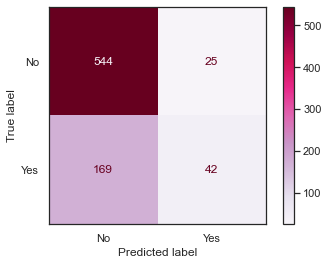

In [85]:
y_pred = pipe.predict(X_test)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix
cm_plot_lr = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cm_plot_lr.plot(cmap="PuRd")

# Show the plot
cm_plot_lr

### Improve the model with SMOTE resampled dataset

In [86]:
X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

In [87]:
X_smo

<4556x74 sparse matrix of type '<class 'numpy.float64'>'
	with 61527 stored elements in Compressed Sparse Row format>

In [88]:
preds_smo, smo_model = build_lr(X_smo, y_smo, X_test, best_params=best_params)
result = evaluate(y_test, preds_smo, "SMOTE")
print(result)
results.append(result)

{'type': 'SMOTE', 'accuracy': 0.8641025641025641, 'recall': 1.0, 'auc': 0.9068541300527241, 'precision': 0.6656151419558359, 'fscore': 0.9810443490701002}


In [89]:
preds_under, under_model = build_lr(X_under, y_under, X_test, best_params = best_params)
result = evaluate(y_test, preds_under, "Under")
print(result)
results.append(result)

{'type': 'Under', 'accuracy': 0.8641025641025641, 'recall': 1.0, 'auc': 0.9068541300527241, 'precision': 0.6656151419558359, 'fscore': 0.9810443490701002}


           type  accuracy    recall       auc  precision    fscore
0      Original  0.843590  0.876777  0.854030   0.658363  0.865731
1      Balanced  0.864103  1.000000  0.906854   0.665615  0.981044
2  Class_weight  0.751282  0.199052  0.577558   0.626866  0.204418
3         SMOTE  0.864103  1.000000  0.906854   0.665615  0.981044
4         Under  0.864103  1.000000  0.906854   0.665615  0.981044


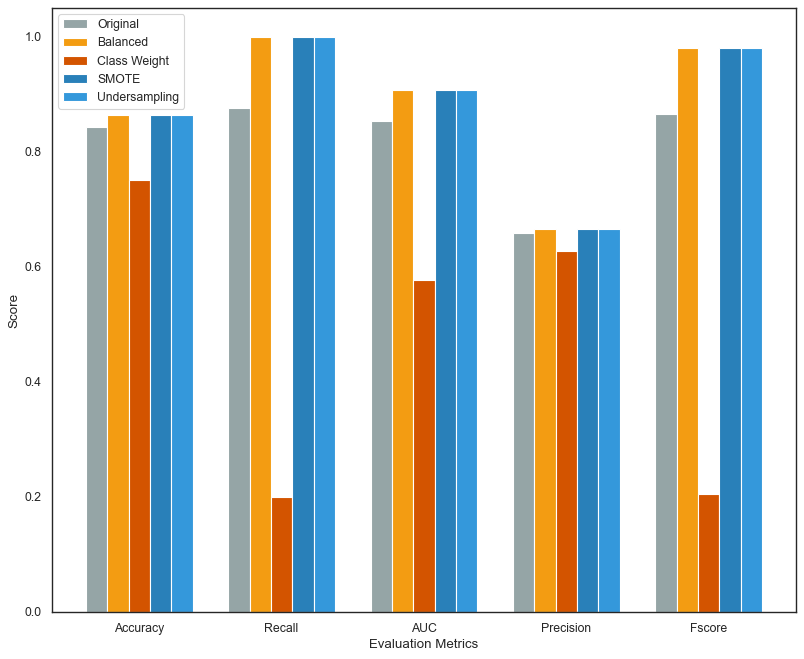

In [90]:
visualize_eval_metrics(results)

#### Interpretation of the Results

1. **Original Model**:
   - The original model shows high **accuracy** and **recall** but relatively lower **precision**. This suggests that while the model captures most true positives, it also predicts more false positives.
   - The **AUC** indicates a fairly good ability to distinguish between classes.

2. **Balanced Resampling**:
   - The **recall** is perfect, meaning all positive instances are captured, though precision is slightly lower compared to the original model.
   - This method shows improvement in **AUC** and a high **F-score**, indicating a strong balance between precision and recall.

3. **Class Weight Adjustment**:
   - This model struggles with both recall and precision, indicating it is not handling class imbalance effectively. The **F-score** is very low, reflecting poor performance.
   - The **AUC** is also significantly lower compared to other methods.

4. **SMOTE** (Synthetic Minority Over-sampling Technique):
   - **SMOTE** results in perfect **recall** and high **F-score**, making it one of the best-performing strategies in this analysis.
   - The improvement in **AUC** suggests that the model is better at distinguishing between classes.

5. **Undersampling**:
   - Similar to SMOTE, undersampling achieves perfect **recall** and a high **F-score**, making it an equally effective technique in this scenario.
   - The **AUC** is also improved, similar to the other successful resampling techniques.

#### Conclusion:
- **SMOTE**, **Undersampling**, and the **Balanced** approach are the most effective techniques, achieving perfect recall and high F-scores.
- **Class Weight Adjustment** performs poorly in this context and may not be suitable for this imbalanced dataset.
- SMOTE and undersampling perform equally well and offer significant improvements over the original model, making them excellent choices for handling imbalance in the data.

## UnSupervised Learning